# NTRODUCCI√ìN A LA VISUALIZACI√ìN EN PYTHON


### Objetivo

- Aprender a graficar datos en Python.
- Entender el uso b√°sico de las librer√≠as m√°s utilizadas: Matplotlib y Seaborn.


### ¬øPor qu√© Matplotlib?
- Es la librer√≠a de visualizaci√≥n m√°s utilizada en el entorno de Python.
- Es sencilla y f√°cil de usar.
- Permite un alto nivel de personalizaci√≥n de los gr√°ficos.
- Es open source.
- Es la base sobre la que se construyen otras librer√≠as como Seaborn.


### Interfaces de Matplotlib
- Definen la forma en la que interactuamos con el gr√°fico. 
- Proveen compatibilidad con el lenguaje que inspir√≥ la librer√≠a: MATLAB
- Existen dos interfaces disponibles:
    - Interfaz orientada a estados, orientada a usuarios de MATLAB para mantener compatibilidad.
    - Interfaz orientada a objetos: Permite mayor grado de control sobre los gr√°ficos porque los tratamos como objetos. 

M√°s Pythonista para nuestro gusto (y la m√°s utilizada)
Del lado Python de la vida! üêçüí™

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt #conda install -c conda-forge matplotlib
import seaborn as sns #conda install -c anaconda seaborn
import pandas as pd #conda install -c anaconda pandas 
import numpy as np

In [2]:
#Estilos existentes:
#https://matplotlib.org/3.5.1/gallery/style_sheets/style_sheets_reference.html
mpl.style.use('bmh')

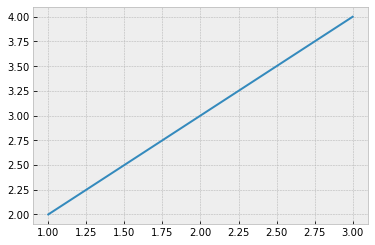

In [3]:
#plt.subplots() Regresa una tupla
#1) Probar plt.subplots (nrows, ncols)

fig, ax = plt.subplots() # inicializa la grafica
ax.plot([1, 3], [2, 4])  # Primera parte el eje horizontal (eje x), la segunda vertical (eje y)

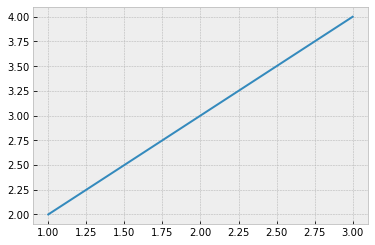

In [4]:
#Hace exactamente lo mismo (orientado a estados)
plt.plot([1, 3], [2, 4])

In [5]:
df_lluvias = pd.read_csv(r'~\Downloads\archive/pune_1965_to_2002.csv')
df_lluvias.head()

Year    Jan    Feb    Mar     Apr     May      Jun      Jul      Aug  \
0  1965  0.029  0.069  0.000  21.667  17.859  102.111  606.071  402.521   
1  1966  0.905  0.000  0.000   2.981  63.008   94.088  481.942   59.386   
2  1967  0.248  3.390  1.320  13.482  11.116  251.314  780.006  181.069   
3  1968  0.318  3.035  1.704  23.307   7.441  179.872  379.354  171.979   
4  1969  0.248  2.524  0.334   4.569   6.213  393.682  678.354  397.335   

       Sep     Oct     Nov     Dec  
0   69.511   5.249  16.232  22.075  
1  150.624   1.308  41.214   4.132  
2  183.757  50.404   8.393  37.685  
3  219.884  73.997  23.326   2.020  
4  205.413  24.014  24.385   1.951

In [6]:
df_lluvias.index = df_lluvias['Year']
df_lluvias = df_lluvias.drop('Year', axis='columns')
df_lluvias.head()

Jan    Feb    Mar     Apr     May      Jun      Jul      Aug      Sep  \
Year                                                                            
1965  0.029  0.069  0.000  21.667  17.859  102.111  606.071  402.521   69.511   
1966  0.905  0.000  0.000   2.981  63.008   94.088  481.942   59.386  150.624   
1967  0.248  3.390  1.320  13.482  11.116  251.314  780.006  181.069  183.757   
1968  0.318  3.035  1.704  23.307   7.441  179.872  379.354  171.979  219.884   
1969  0.248  2.524  0.334   4.569   6.213  393.682  678.354  397.335  205.413   

         Oct     Nov     Dec  
Year                          
1965   5.249  16.232  22.075  
1966   1.308  41.214   4.132  
1967  50.404   8.393  37.685  
1968  73.997  23.326   2.020  
1969  24.014  24.385   1.951

#### Graficaremos precipitaciones acumuladas de distintos a√±os

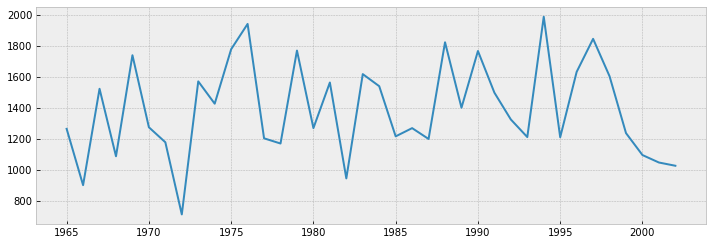

In [10]:
# 1)Obtendremos del eje x por medio del indice.
# 2)Obtendremos del eje y, la suma por a√±o (axis = 1)

x = df_lluvias.index
y = df_lluvias.sum(axis=1)
fig, ax = plt.subplots(figsize=(12, 4)) #figsize=(width, height) por pulgadas
# https://pixelsconverter.com/pixels-to-inches 
# https://www.unitconverters.net/typography/pixel-x-to-centimeter.htm
ax.plot(x, y, label='Precipitaciones acumuladas')

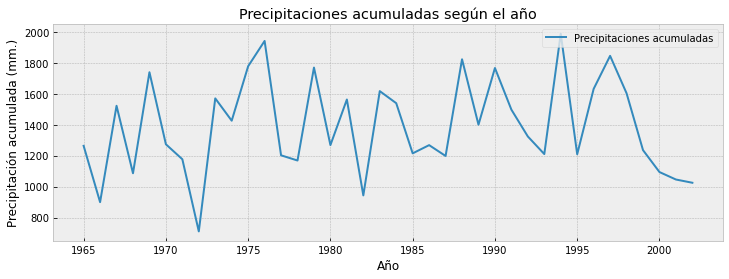

In [12]:
ax.set_xlabel('A√±o')  
ax.set_ylabel('Precipitaci√≥n acumulada (mm.)')
ax.set_title('Precipitaciones acumuladas seg√∫n el a√±o') 
#ax.legend()
ax.legend(loc='upper right')
fig # Para que aparezca de nuevo la grafica

1975
1985


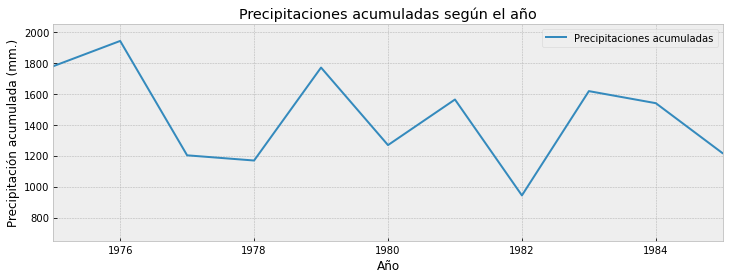

In [16]:
print(df_lluvias.index[10])
print(df_lluvias.index[20])
ax.set_xlim(df_lluvias.index[10], df_lluvias.index[20])
fig
#fig.savefig("precipitaciones_a√±o.pdf") #Exportamos el grafico en un archivo pdf

### Tipos de Graficos

#### Gr√°ficos de l√≠neas

- Son adecuados para visualizar datos con secuencialidad temporal, como las series de tiempo.
- Se grafican con el m√©todo  ax.plot(x, y)
- En caso de no especificarse x, matplotlib toma como coordenadas en x al arreglo de n√∫meros enteros [0, 1, 2, ‚Ä¶, n]

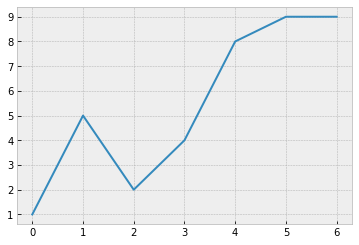

In [22]:
fig, ax = plt.subplots()
ax.plot([0, 1, 2, 3, 4, 5, 6], [1, 5, 2, 4, 8, 9, 9])

#### Gr√°ficos de puntos o dispersi√≥n

- √ötiles cuando se tienen una **gran cantidad de datos num√©ricos emparejados**
- Permiten visualizar la relaci√≥n entre las variables por medio de la **nube de puntos**
    - Nube de puntos ‚Äúalineada‚Äù         --> relaci√≥n fuerte
    - Nube de puntos ‚Äúdispersa‚Äù          --> relaci√≥n d√©bil o nula
-Se grafican con ax.scatter

In [23]:
pesos = [42.8, 43.3, 42. , 44. , 44.1, 43.5, 48.1, 48.9, 47.7,46.9,50.4,
       52.7, 51.8, 54.5, 54.2, 56.9, 55.4, 55.5, 57.1, 58.3, 63.7, 58.8,
       64.6, 60.2, 64. , 63.8, 61.4, 66.3, 64.7, 63.9, 69.3, 67.9, 65.2,
       70.8, 70.5, 69.3, 75.3, 75.5, 78.2, 78. , 73.2, 78. , 80.1, 78.2,
       76. , 81.5, 79.4, 81.8, 81.8, 84.1]
alturas = [149. , 149. , 149.9, 156.8, 150.6, 155.4, 151. , 162. , 165.,
       157.8, 164.4, 160.1, 160.8, 163.8, 175.2, 162. , 159.5, 159.2,
       169.8, 166.7, 179.4, 180.6, 163.3, 178.8, 176.3, 184.8, 181. ,
       170.5, 184.1, 187.1, 187.1, 177.7, 184.5, 190.3, 196. , 192.1,
       200.4, 201.8, 187.5, 202.1, 200.3, 208.8, 204.6, 193.5, 200.9,
       196.8, 213.1, 204.8, 215.5, 210.2] 

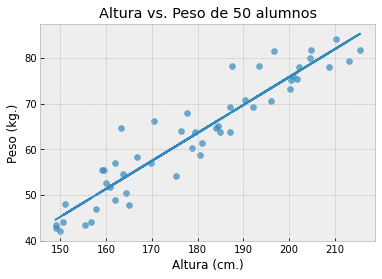

In [61]:
fig, ax = plt.subplots()
ax.scatter(alturas, pesos, alpha=0.7) # Codigo para crear un grafico de puntos
ax.set_title('Altura vs. Peso de 50 alumnos')
ax.set_xlabel('Altura (cm.)')
ax.set_ylabel('Peso (kg.)')
#Obtener el la pendiente y el intercepto
m, b = np.polyfit(alturas, pesos, 1)

#Graficar la pendiente 
plt.plot(np.array(alturas), m*np.array(alturas)+b)

C:\Users\mi13966\AppData\Local\Temp\1\ipykernel_17320\640953147.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(mapeo_colores)


Text(0, 0.5, 'Precipitaciones en Septiembre (mm.)')

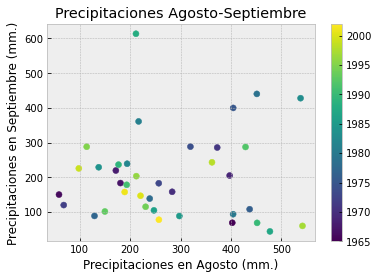

In [33]:
# Vamos a crear una grafica de puntos para ver la relaci√≥n de la presipitaci√≥n de Ago y Sep
fig, ax = plt.subplots()  
mapeo_colores = ax.scatter(df_lluvias['Aug'], df_lluvias['Sep'], c=df_lluvias.index)
# s = asigna el tama√±o de los puntos
# s = podemos asignarle una lista de tama√±o N
fig.colorbar(mapeo_colores)
ax.set_title('Precipitaciones Agosto-Septiembre')
ax.set_xlabel('Precipitaciones en Agosto (mm.)')
ax.set_ylabel('Precipitaciones en Septiembre (mm.)')

#### Gr√°ficos de barras

- Permiten comparar y poner en perspectiva los valores de distintas variables categ√≥ricas. Por ejemplo, las precipitaciones seg√∫n el mes del a√±o. 
- Para el ejemplo, acumulemos las precipitaciones para los distintos meses a lo largo de los a√±os.


Text(0.5, 0, 'Mes')

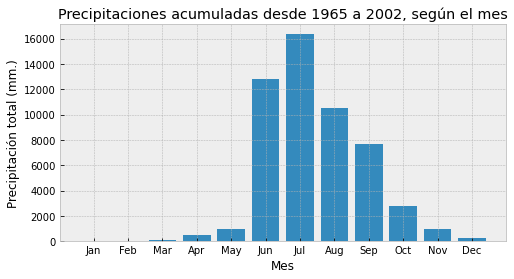

In [34]:
fig, ax = plt.subplots(figsize=(8,4))
precipitaciones_acumuladas = df_lluvias.sum()
ax.bar(df_lluvias.columns, precipitaciones_acumuladas)
ax.set_title('Precipitaciones acumuladas desde 1965 a 2002, seg√∫n el mes')
ax.set_ylabel('Precipitaci√≥n total (mm.)')
ax.set_xlabel('Mes')

#### Histograma

- La altura de cada barra representa la proporci√≥n o cantidad de los distintos valores de una variable num√©rica.
- Requiere clasificar a los datos en intervalos de clase.
- Permiten comparar la frecuencia relativa o absoluta de cada intervalo.
- Se construyen con ax.hist, que recibe como par√°metro:
    - El arreglo de valores. 
    - bins, que representa la cantidad de intervalos a construir.

Text(0, 0.5, 'Frecuencia absoluta')

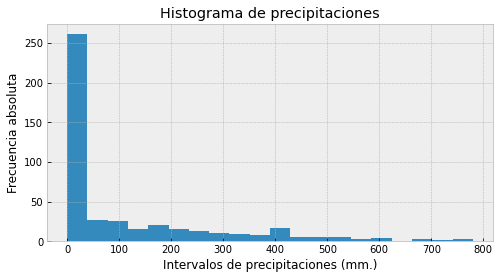

In [59]:
fig, ax = plt.subplots(figsize=(8, 4))
# https://www.geeksforgeeks.org/numpy-ndarray-flatten-function-python/
ax.hist(df_lluvias.values.flatten(), bins=20)
ax.set_title('Histograma de precipitaciones')
ax.set_xlabel('Intervalos de precipitaciones (mm.)')
ax.set_ylabel('Frecuencia absoluta')

In [44]:
np.median(df_lluvias.values.flatten())

19.0925

### Enriqueciendo las visualizaciones

#### M√∫ltiples elementos

- En ocasiones necesitamos resaltar ciertas caracter√≠sticas de los datos. 
- Por ejemplo, ¬øQu√© pasa si quisi√©ramos resaltar el punto m√°ximo en una serie de tiempo?
- Podemos cargar al objeto ax con m√∫ltiples elementos para que los muestre todos juntos?

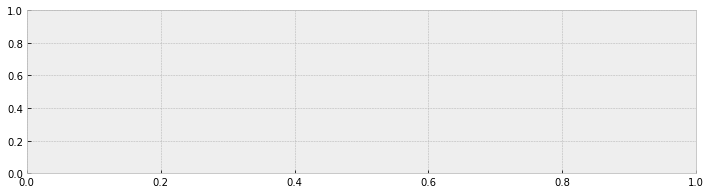

In [50]:
# Comparemos las precipitaciones de Enero y Febrero en el mismo objeto ax

fig, ax = plt.subplots(figsize=(12, 3))  


In [51]:
ax.plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax.plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')

In [52]:
maximo_enero = df_lluvias['Jan'].max()
maximo_febrero =  df_lluvias['Feb'].max()
ax.axhline(maximo_enero, color='red', linestyle='--', alpha=0.5,    linewidth=3, label='M√°xima de enero')
ax.axhline(maximo_febrero, color='red', linestyle=':', alpha=0.5, linewidth=3, label='M√°xima de febrero')

In [55]:
ax.set_xlabel('A√±o')  
ax.set_ylabel('Precipitaci√≥n (mm.)') 
ax.set_title('Precipitaciones de enero y febrero')
ax.set_xlim(df_lluvias.index[0], df_lluvias.index[-5])
ax.legend()

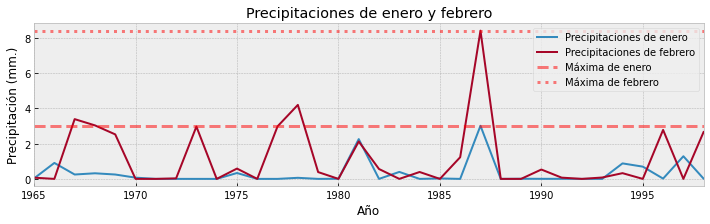

In [56]:
fig